# Thresholding - Example

The code below shows an example of thresholding, or binarization, of a given image. For this, the libraries to be used are: 
1. [imageio](https://pypi.org/project/imageio/)
2. [matplotlib](https://pypi.org/project/matplotlib/)
3. [numpy](https://pypi.org/project/numpy/)

In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

After importing the necessary modules, a set of utilitary functions are defined:

In [2]:
def convert_to_grayscale(img : np.ndarray):
  """Function that converts an image to grayscale with standard color weights.

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""

  return 0.299*img[:, :, 0] + 0.587*img[:, :, 1] + 0.114*img[:, :, 2]

def normalize(img : np.ndarray, min = 0.0, max = 1.0):
  """Function that converts an image to the given desired range.
  
  Parameters
  ----------

  img : np.ndarray
    Image to be normalized.
  min : float
    Bottom value of the new range for conversion.
  max : float
    Top value of the new range for conversion."""
  return ((img - np.min(img))/(np.max(img) - np.min(img)))*(max - min) + min

def to_image(img : np.ndarray):
  """Converts an image to the 8-bit unsigned integer range

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""
  
  return normalize(img, 0.0, 255.0).astype(np.uint8)

def thresholding(img : np.ndarray, threshold : float = 0.5):
  """Limiarizes the image given a threshold. If the image is not on grayscale format,
  it will be converted to and then limiarized.
  
  Parameters
  ----------
  
  img : np.ndarray
    Image to be limiarized.
  threshold : float inside the range (0.0, 1.0]
    Threshold to limiarize the image."""
  assert 0.0 < threshold < 1.0, 'threshold out of range of (0.0, 1.0].'
  new_img = convert_to_grayscale(img) if len(img.shape) > 2 else np.copy(img)

  new_img[img < threshold] = 0.0
  new_img[img >= threshold] = 1.0

  return new_img

To read the image, the imageio.v3.imread function is used:

(-0.5, 999.5, 999.5, -0.5)

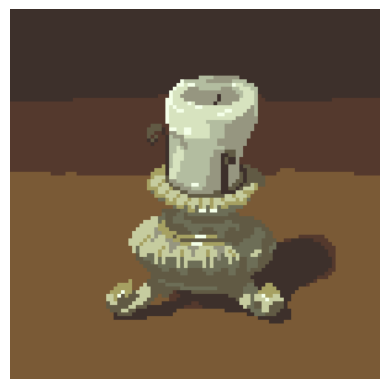

In [3]:
img = iio.imread("imagens/vela.png")

plt.imshow(img)
plt.axis("off")

We then covert it to grayscale to simplify the binarization:

(-0.5, 999.5, 999.5, -0.5)

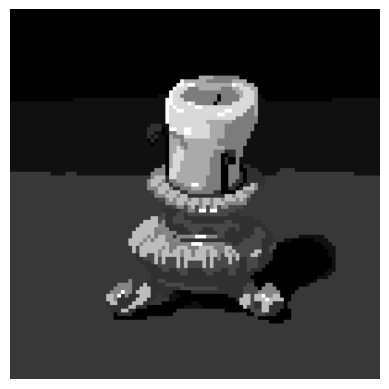

In [4]:
img_gray = convert_to_grayscale(normalize(img))

plt.imshow(img_gray, cmap= "gray")
plt.axis("off")

And finally apply the thresholding algorithm:

(920900,)


(-0.5, 999.5, 999.5, -0.5)

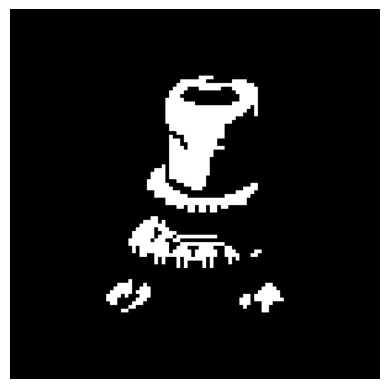

In [5]:
thres = thresholding(img_gray, 0.5)

plt.imshow(thres, cmap= "gray")
plt.axis("off")